In [1]:
#Building first predictive model using pytorch

### The PyTorch neural network module (torch.nn)
torch.nn is an elegantly designed module developed to help create and train NNs. It allows easy pro-
totyping and the building of complex models in just a few lines of code.<br><br>
To fully utilize the power of the module and customize it for your problem, you need to understand
what it’s doing. To develop this understanding, we will first train a basic linear regression model on a
toy dataset without using any features from the torch.nn module; we will use nothing but the basic
PyTorch tensor operations.<br><br>
Then, we will incrementally add features from torch.nn and torch.optim. As you will see in the
following subsections, these modules make building an NN model extremely easy. We will also take
advantage of the dataset pipeline functionalities supported in PyTorch, such as Dataset and DataLoader,
which you learned about in the previous section.<br><br> In this book, we will use the torch.nn module to
build NN models.
The most commonly used approach for building an NN in PyTorch is through nn.Module, which allows
layers to be stacked to form a network. This gives us more control over the forward pass. We will see
examples of building an NN model using the nn.Module class.<br><br>
Finally, as you will see in the following subsections, a trained model can be saved and reloaded for
future use.

### Building a linear regression model

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

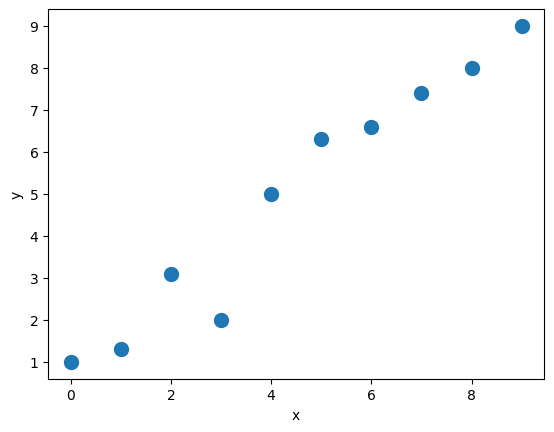

In [3]:
X_train = np.arange(10, dtype='float32').reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize = 10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#standardize the dataset features- mean centering and dividing by the standard deviation
#create a pytorch dataset for the training set and a corresponding DataLoader

In [5]:
from torch.utils.data import TensorDataset

In [6]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

In [7]:
print(X_train_norm)

tensor([[-1.5667],
        [-1.2185],
        [-0.8704],
        [-0.5222],
        [-0.1741],
        [ 0.1741],
        [ 0.5222],
        [ 0.8704],
        [ 1.2185],
        [ 1.5667]])


In [8]:
print(y_train)

tensor([1.0000, 1.3000, 3.1000, 2.0000, 5.0000, 6.3000, 6.6000, 7.4000, 8.0000,
        9.0000])


In [9]:
from torch.utils.data import DataLoader

In [10]:
train_ds = TensorDataset(X_train_norm, y_train)


In [11]:
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [12]:
print(train_ds)

In [13]:
#define the linear regression model as z = wx + b
# torch.nn module will be used
# torch.nn provides predefined layers for building complex NN models

In [14]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):#model
  return(xb @ weight + bias)

def loss_fn(input, target):#mean squared error as loss function
  return (input - target).pow(2).mean()

In [15]:
#training the model
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()#to perform backward propagation
  with torch.no_grad():
    weight -= weight.grad * learning_rate
    bias -= bias.grad * learning_rate
    weight.grad.zero_()
    bias.grad.zero_()

  print(f'Epoch {epoch} Loss {loss.item():.4f}' )

Epoch 0 Loss 46.5720
Epoch 1 Loss 25.2290
Epoch 2 Loss 35.6882
Epoch 3 Loss 3.7339
Epoch 4 Loss 33.4762
Epoch 5 Loss 3.4889
Epoch 6 Loss 10.9662
Epoch 7 Loss 20.3101
Epoch 8 Loss 45.4799
Epoch 9 Loss 32.5139
Epoch 10 Loss 27.1502
Epoch 11 Loss 9.2419
Epoch 12 Loss 8.9340
Epoch 13 Loss 29.9255
Epoch 14 Loss 35.4018
Epoch 15 Loss 25.5995
Epoch 16 Loss 7.8102
Epoch 17 Loss 14.2428
Epoch 18 Loss 2.2440
Epoch 19 Loss 1.7323
Epoch 20 Loss 1.6446
Epoch 21 Loss 20.1641
Epoch 22 Loss 11.9683
Epoch 23 Loss 6.2012
Epoch 24 Loss 1.3318
Epoch 25 Loss 5.8122
Epoch 26 Loss 0.5642
Epoch 27 Loss 5.4505
Epoch 28 Loss 13.2929
Epoch 29 Loss 14.6182
Epoch 30 Loss 14.4571
Epoch 31 Loss 8.8072
Epoch 32 Loss 1.4297
Epoch 33 Loss 12.6939
Epoch 34 Loss 0.7656
Epoch 35 Loss 12.1448
Epoch 36 Loss 4.1100
Epoch 37 Loss 9.4604
Epoch 38 Loss 12.8366
Epoch 39 Loss 9.7686
Epoch 40 Loss 11.7827
Epoch 41 Loss 8.9465
Epoch 42 Loss 3.4275
Epoch 43 Loss 8.4429
Epoch 44 Loss 0.9932
Epoch 45 Loss 9.0273
Epoch 46 Loss 7.5029
E

In [16]:
#testing phase
print('Final parameters:', weight.item(), bias.item())


Final parameters: 2.670930862426758 4.88258695602417


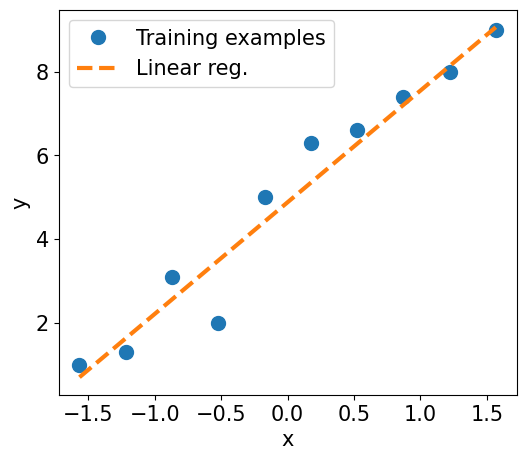

In [17]:
X_test = np.linspace(0, 9, num = 100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm, y_train, 'o', markersize = 10)
plt.plot(X_test_norm, y_pred,'--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize = 15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size = 15)
ax.tick_params(axis='both', which ='major', labelsize=15)
plt.show()

### Model training via the torch.nn and torch.optim modules

torch.nn - provides a set of loss functions<br>
torch.optim - supports mostly used optimization algorithms that can be called to update the parameters based on the computed gradients.

In [19]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction ='mean')#loss function for training
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)#Linear class for linear layer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [20]:
#Now, call the step() method of the optimizer to train the model.

In [21]:
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    #1. generate predictions
    pred = model(x_batch)[:, 0]
    #2. calculate loss
    loss = loss_fn(pred, y_batch)
    #3. compute gradients
    loss.backward()
    #4. update paprameters using gradients
    optimizer.step()
    #5. Reset the gradients to zero
    optimizer.zero_grad()

  if epoch % log_epochs==0:
    print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 24.6684
Epoch 10 Loss 29.1377
Epoch 20 Loss 20.9207
Epoch 30 Loss 0.1257
Epoch 40 Loss 12.4922
Epoch 50 Loss 1.7845
Epoch 60 Loss 7.6425
Epoch 70 Loss 2.5606
Epoch 80 Loss 0.0157
Epoch 90 Loss 0.7548
Epoch 100 Loss 0.8412
Epoch 110 Loss 0.4923
Epoch 120 Loss 0.0823
Epoch 130 Loss 0.0794
Epoch 140 Loss 0.0891
Epoch 150 Loss 0.0973
Epoch 160 Loss 0.1043
Epoch 170 Loss 0.1103
Epoch 180 Loss 0.0009
Epoch 190 Loss 0.0764


In [22]:
print('Final parameters: ', model.weight.item(), model.bias.item())

Final parameters:  2.6496422290802 4.87706995010376


### Building a multilayer perceptron for classifying flowers in the Iris dataset

In [23]:
#building a two-layer perceptron using the torch.nn module

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()#to load the dataset

In [44]:
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1./3, random_state = 1)

In [45]:
#normalizing the dataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

list of layers available at: https://pytorch.org/docs/stable/nn.html

In [46]:
#linear layer = fully connected layer or dense layer
# representation = f(w *x + b)
# f is activation function
# w, b = weight and bias matrix
# x = tensor of features
# dimensionality = rank and shape
# In case of iris dataset
# no. of features = x = 4
# So no. of input neurons = 4
# no. of layers considered = 2 , total = 3 ( input layer, hidden layer, output layer)
# no. of neurons in hidden layer = 16
# no. of neurons in output layer = 3( 3 classes for classification)
# implementing this now

In [47]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

In [48]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)
#Sigmoid activation function has been used for first layer
#Softmax activation function has been used for second layer

In [49]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [50]:
#training
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item()*y_batch.size(0)
    is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.mean()
  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)

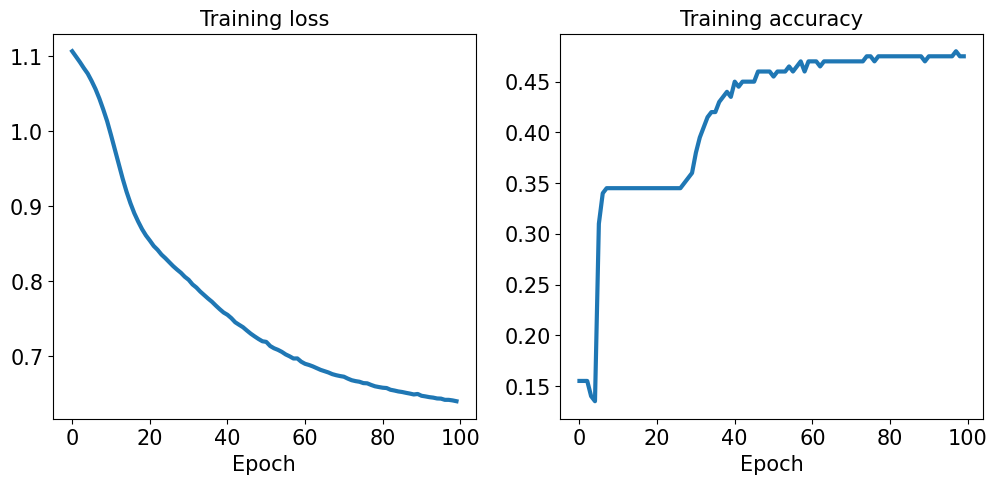

In [51]:
#plotting
fig = plt.figure(figsize =(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw = 3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist, lw = 3)
ax.set_title('Training accuracy', size =15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize=15)
plt.show()

#### Evaluating the trained model on the test dataset


In [53]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim =1) == y_test).float()
accuracy = correct.mean()
print(f'Test Accuracy: {accuracy:.4f}' )


Test Accuracy: 0.9800


#### Saving and reloading the trained model

In [54]:
#trained models can be saved on disk for future use. This can be done as follows
path = "/content/drive/MyDrive/iris_classifier.pt"
torch.save(model, path)

In [55]:
#save(model) saves model architecture and all the learned parameters.
#extension to save is 'pt' or 'pth'

In [56]:
#reloading the saved model
model_new = torch.load(path)

In [57]:
#to verify the model architecture
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [58]:
#to evaluate the reloaded model
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1)== y_test).float()
accuracy = correct.mean()
print(f'Test Acc: {accuracy:.4f}')

Test Acc: 0.9800


In [59]:
#to save only the learned parameters
path = "/content/drive/MyDrive/iris_classifier_state.pt"
torch.save(model.state_dict(),path)


In [61]:
#to reload the saved parameters, we first need to reconstruct the model as we did before, then feed the loaded parameters to the model
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>